This 3rd notebook in Week1 mimics NN forward-propagation in numpy.
* Binary Classification
* Algo is same Coffee Roast as in Small_NN example
* 2 layers [3 neurons in first, and second layer is output]
* Sigmoid activation

In [51]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

Inputs

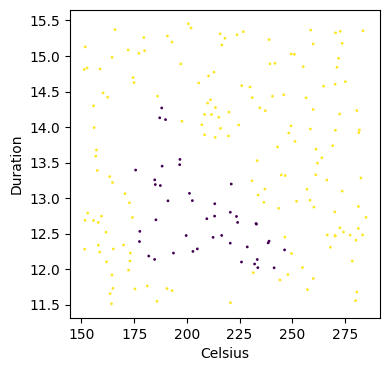

In [52]:
inputs = np.load("coffee_roast.npz")

x_train = inputs["train_x"]
y_train = inputs["train_y"]

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_train[:,0], x_train[:,1], c=1-y_train, s=1)
ax.set_ylabel("Duration")
ax.set_xlabel("Celsius")
plt.show()

Normalize data

In [53]:
norm_layer = tf.keras.layers.Normalization(axis=-1)
norm_layer.adapt(x_train)
x_norm = norm_layer(x_train)

# Numpy model

<center> <img  src="./images/C2_W1_RoastingNetwork.PNG" width="200" />   <center/>  
Let's build the "Coffee Roasting Network" described in lecture. There are two layers with sigmoid activations.

As described in lecture, it is possible to build your own dense layer using NumPy. This can then be utilized to build a multi-layer neural network. 

<img src="./images/C2_W1_dense3.png" width="600" height="450">

Define activation function

In [54]:
g = lambda x: 1 / (1 + np.exp(-x))

Define dense layer - function that computes activation

In [55]:
def dense(a_in, W, b):
    
    neurons_qty = W.shape[1]
    a_out = np.zeros(neurons_qty)

    for i in range(neurons_qty):
        w = W[:,i]
        f = np.dot(a_in, w) + b[i]
        a_out[i] = g(f)

    return a_out

Forward propagation

In [56]:
def sequential(x,w1,b1,w2,b2):

    a1 = dense(x,w1,b1)
    a2 = dense(a1,w2,b2)

    return a2

Prediction:
a routine similar to Tensorflow's `model.predict()`. This will take a matrix $x$ with all $m$ examples in the rows and make a prediction by running the model.

In [57]:
def predict(x_new,w1,b1,w2,b2):

    m = x_new.shape[0]
    probability = np.zeros(m)
    for i in range(m):
        probability[i] = sequential(x_new[i],w1,b1,w2,b2)
    
    prediction = probability > 0.5
    return prediction

Weights from previous lecture

In [58]:
W1_tmp = np.array( [[-8.93,  0.29, 12.9 ], [-0.1,  -7.32, 10.81]] )
b1_tmp = np.array( [-9.82, -9.28,  0.96] )
W2_tmp = np.array( [[-31.18], [-27.59], [-32.56]] )
b2_tmp = np.array( [15.41] )

Try on 2 examples

In [59]:
x_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
x_test_norm = norm_layer(x_test)  # remember to normalize
predictions = predict(x_test_norm, W1_tmp, b1_tmp, W2_tmp, b2_tmp)
predictions

array([ True, False])